<a href="https://colab.research.google.com/github/Diacod-I/TSF-GRIP-May-2023/blob/main/Task%232/TSF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
plt.style.use("dark_background")

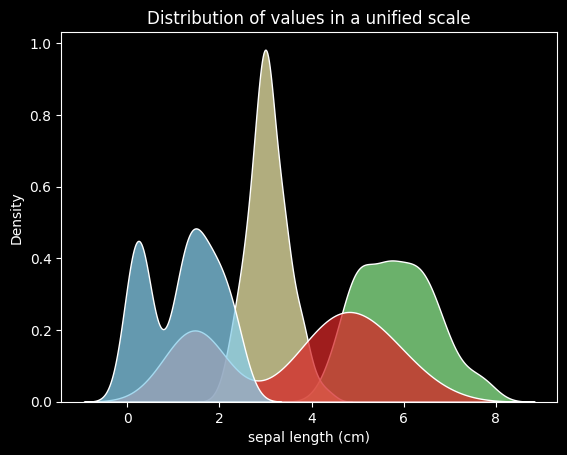

In [5]:
colorpal = ["lightgreen","palegoldenrod","tab:red","skyblue"]
inde=0
for i in iris_df[:]:
  sns.kdeplot(iris_df.loc[:][i],multiple="stack",color=colorpal[inde])
  inde+=1
plt.title("Distribution of values in a unified scale")
plt.show()

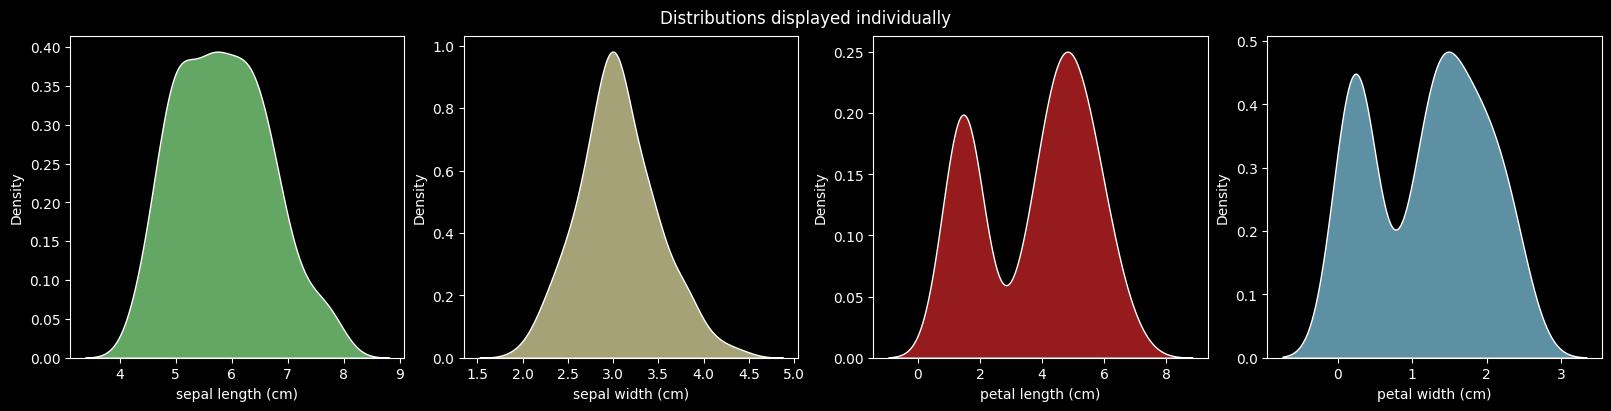

In [6]:
fig,ax = plt.subplots(1,4,figsize=(16,4),layout="constrained")
inde = 0
for i in iris_df.columns:
  sns.kdeplot(iris_df.loc[:][i],ax=ax[inde],label=i,multiple="stack",color=colorpal[inde],alpha=0.7)
  inde+=1
fig.suptitle("Distributions displayed individually")
plt.show()

<Axes: >

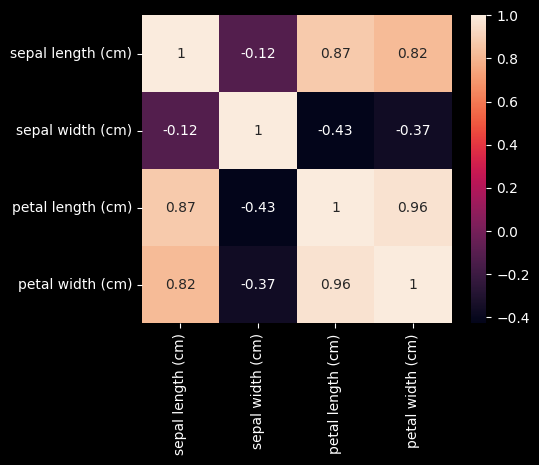

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(iris_df.corr(),annot=True)

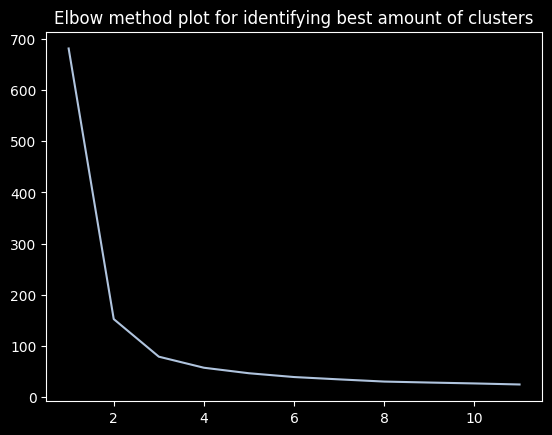

In [8]:
wcss = [] #Within Cluster Sum of Squares
for i in range(1,12):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=42)
  kmeans.fit(iris_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss,c="lightsteelblue")
plt.title("Elbow method plot for identifying best amount of clusters")
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

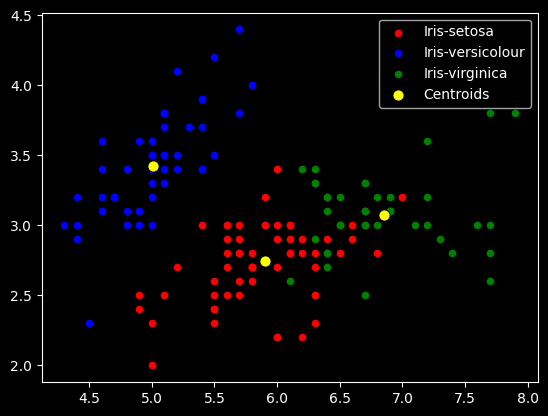

In [31]:
plt.scatter(iris_df.iloc[y_kmeans == 0, 0], iris_df.iloc[y_kmeans == 0, 1], 
            s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df.iloc[y_kmeans == 1, 0], iris_df.iloc[y_kmeans == 1, 1], 
            s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df.iloc[y_kmeans == 2, 0], iris_df.iloc[y_kmeans == 2, 1],
            s = 20, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 40, c = 'yellow', label = 'Centroids',zorder=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 60, c = 'grey',zorder=5,edgecolor="black")

plt.legend()